<a href="https://colab.research.google.com/github/samuelbolugee/PythonDSProjects/blob/main/FakeNewsWithPACandGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fake News Detection with ML and Evolutionary Algorithms in Python - Data Science Project 1

Seeing is believing, right?

Maybe not.

Not all the things people say are true (after all, lying is as old as humanity itself!), and in this day and age where information can go from Kaduna to Karachi, or from Lagos to London or even Lisbon in seconds, there will always exist news articles and information put out by people which is simply put - **not true**.

***Fake news, to me, is a travesty that undermines the very foundation of truth and information. It distorts reality, sows confusion, and erodes the trust we place in the sources that should inform and guide us.***

How do we then combat the spread of misinformation, and ensure that the truth really prevails?

Let's go on a journey to utilize the power of Python to detect fake news from real news.

##Firstly,...

Let's make the necessary imports:

In [ ]:
import numpy as np
import pandas as pd
import itertools
# Next, we import from sklearn:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Let's discuss some of the ones that aren't so familiar.

1. **Itertools:** Python’s `itertools` is a module that provides various functions that work on iterators to produce complex iterators. In Python, `itertools` is a module that provides a set of useful tools for working with iterators, which are objects that allow you to loop over a sequence of values, one at a time. It's a part of the standard library, so you don't need to install anything extra to use it.

The `itertools` module contains various functions that generate iterators for common tasks like creating combinations, permutations, and cycling through sequences. It's especially helpful when you want to perform operations on sequences without having to create full lists in memory, which can be more memory-efficient.

2. **TF-IDF Vectorizer:**

a. TF-IDF: The full form of "TF-IDF" is Term Frequency-Inverse Document Frequency. It's a technique that helps to represent the importance of words in a document relative to a collection of documents. It works like this:

i. Term Frequency (TF): This measures how often a word appears in a document. Words that appear more often are likely to be important within that document.

ii. Inverse Document Frequency (IDF): This measures how unique or rare a word is across the entire collection of documents. Words that are rare but appear in only a few documents might carry more meaning.

iii. TF-IDF: It's the product of TF and IDF. It combines the importance of a word in a specific document with its uniqueness across all documents.

b. Vectorizer: In the context of TfidfVectorizer, this is about converting text into numbers that a machine learning algorithm can process. It's like turning words into numerical features.

So, `TfidfVectorizer` takes a bunch of text documents and does the following:

1. It counts the frequency of words in each document (TF).
2. It calculates how unique or common each word is across all documents (IDF).
3. It combines these two measures to assign a numerical value to each word in each document.
4. The result is a matrix where rows represent documents, columns represent words, and the numbers in the matrix are the TF-IDF values of the words in the documents.

This matrix can then be fed into machine learning algorithms for tasks like classification. It helps the algorithm understand the importance of different words in different documents, allowing it to make better predictions or decisions based on the textual content.

## The PassiveAggressive Classifier

The Passive-Aggressive Classifier is a machine learning algorithm used for binary classification tasks. It's often employed when dealing with online learning scenarios, where data arrives one at a time and the model needs to adapt to new information incrementally.

**Here's a simple explanation of how the Passive-Aggressive Classifier works:**

When a new data point comes in, the classifier predicts its label based on the current model's understanding. This is the  "passive behaviour".

If the prediction is incorrect, the classifier becomes "aggressive" and adjusts its model to correct the mistake. It updates its parameters to better align with the new data while maintaining a "margin" between different classes. This is the "aggressive update". However, if the prediction is correct, the classifier remains "passive" and doesn't change its model much. This is because the data point doesn't challenge the current understanding significantly.

Now, let's import our dataset and check it out!

In [ ]:
df = pd.read_csv('news.csv')
df.head(20)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
df.shape

(6335, 4)

Next, let's separate the labels.

In [ ]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

Now, we split the data into training and testing datasets (75% training, 25% testing).

We will be taking the **`text`** column of the dataset.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.25, random_state = 7)

##Initializing the TfidfVectorizer

See [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for the documentation on this.

Two parameters are of interest to us:
1. `stop_words`: These are common words such as "and", "him", and "the", which do not give any significant information in the contextual analysis of text, and as such can be dropped in order to avoid the occurrence of them being misconstrued as "signals for prediction".

For this project, I will be using a stop word list from the English language.

2. `max_df`: This basically stands for **maximum document frequency**. This basically means that the vectorizer should discard words that have a document frequency strictly higher than the given threshold.

In [ ]:
# We initialize the vectorizer - make sure it's "english" and not "English"!
tf_idf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

#Perform a fit-transform on the training and testing data
tf_idf_train = tf_idf.fit_transform(x_train)
tf_idf_test = tf_idf.transform(x_test)

Please take note - you **fit-transform** the training set, and **transform** the testing set!

## Evolutionary Algorithms - An Overview of the Genetic Algorithm

*Hold up! Wait a minute, something ain't right!*

I know, I know, "evolution" inside computer science? 😞

Don't worry - I will explain, just bear with me.

So, there is a class of algorithms that were inspired from nature, specifically the evolutionary process. These are called evolutionary algorithms, or EAs for short.
EAs are algorithms that uses mechanisms inspired by nature and solve problems through processes that emulate the behaviors of living organisms.

One of such EAs is the ***genetic algorithm***, which is what I will be using today.

The genetic algorithm is a method for solving optimization problems that is based on *natural selection*, the process that drives biological evolution. The genetic algorithm repeatedly modifies a population of individual solutions.

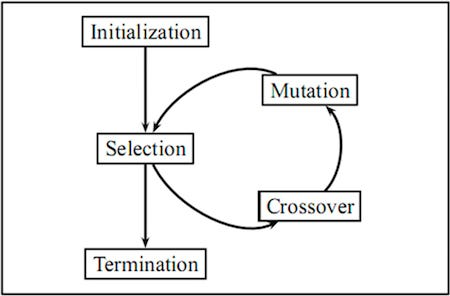

## So, how does the genetic algorithm work?

Here's the breakdown on how a Genetic Algorithm works:

1. **Initialization:**
First, you start by creating an initial population of potential solutions (individuals) to the problem. Each individual is represented as a set of parameters or genes.

2. **Fitness Evaluation:**
Next, you evaluate the fitness of each individual in the population. The fitness function quantifies how well an individual solves the problem. It serves as a measure of the individual's quality within the context of the problem.

3. **Selection:**
Select individuals from the current population for reproduction based on their fitness. Individuals with higher fitness are more likely to be selected, emulating the concept of *"survival of the fittest."*

4. **Crossover (Recombination):**
Perform crossover, also known as recombination, by combining the genetic information of two selected individuals to create one or more offspring. This mimics the idea of sexual reproduction where genetic material is exchanged between parents.

5. **Mutation:**
Apply mutation to some of the offspring's genes with a certain probability. Mutation introduces small random changes to the genetic information, allowing the algorithm to explore new regions of the solution space.

6. **Replacement:**
Replace some individuals in the current population with the newly generated offspring. This ensures that the population evolves over generations and that better solutions have a chance to propagate.

7. **Termination Criteria:**
Repeat steps 2 to 6 for a certain number of generations or until a termination condition is met (e.g., a satisfactory solution is found, or the algorithm reaches a maximum number of iterations).

8. **Solution Extraction:**
After the algorithm terminates, the best solution (individual) found in the final population is considered the output of the GA.

With that being said, let's put it into practice!

3...2...1... **Action!**

In [ ]:
#We must first install our genetic algorithm package: DEAP (Distinguished Evolutionary Algorithms Package)
!pip install geneticalgorithm

 The best solution found:
 [0.16956992]

 Objective function:
 0.922979797979798


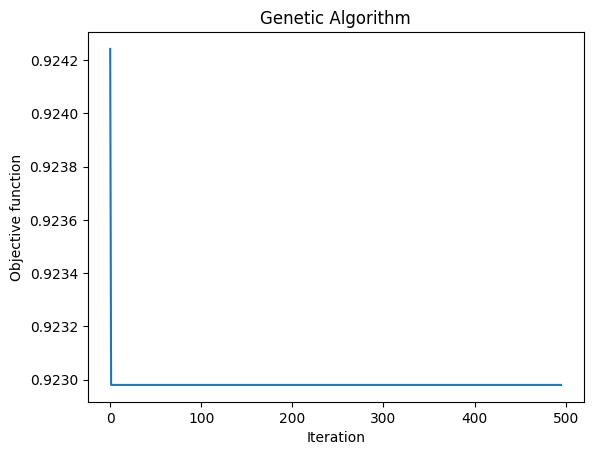

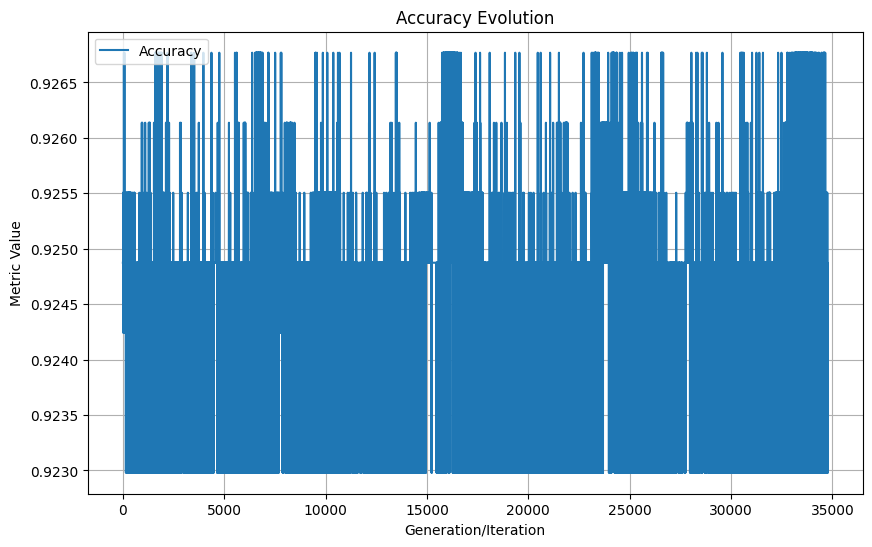

Best parameters: [0.16956992]
Best accuracy: 0.9267676767676768


In [ ]:
from geneticalgorithm import geneticalgorithm as ga

# Firstly, we define the fitness function for our genetic algorithm.
# Inside this function is where we will instantiate our PassiveAggressive Classifier, since that is what we are trying to optimize.

# Lists to store accuracy and precision values for each generation
accuracy_history = []

def fitness(param):
  C = param # This is the parameter of the PAC we want to optimize
  C = float(C)
  clf = PassiveAggressiveClassifier(C=C, max_iter=100, random_state = 42) # random_state is for reproducibility of results.
  clf.fit(tf_idf_train, y_train) # Fit the classifier on the training data
  y_pred = clf.predict(tf_idf_test) # Predict on the testing data
  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  # Append metrics to history
  accuracy_history.append(accuracy)
  return accuracy # Returns the accuracy of our predictions

# Genetic algorithm setup
varbound = np.array([[0.1, 10]])
variable_type = 'real' # 'real' for continuous, 'int' for integer


alg_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

# Run the genetic algorithm
model = ga(function = fitness, dimension = 1, variable_type = variable_type, variable_boundaries=varbound, algorithm_parameters = alg_param)
model.run()

# Get the best individual and its fitness
best_params = model.output_dict['variable'] # output_dict is a dictionary including the best set of variables found and the value of the given function associated to it ({'variable': , 'function': }).
best_C = best_params[0]
#best_max_iter = int(best_params[1])

# Train final classifier
final_classifier = PassiveAggressiveClassifier(C=best_C, max_iter=50)
final_classifier.fit(tf_idf_test, y_test)

# Now, we create a viz that will help us understand the changes in accuracy with respect to each generation
# Plot accuracy and precision changes over generations/iterations
generation_numbers = np.arange(1, len(accuracy_history) + 1)

plt.figure(figsize=(10, 6))
plt.plot(generation_numbers, accuracy_history, label='Accuracy')
plt.xlabel('Generation/Iteration')
plt.ylabel('Metric Value')
plt.title('Accuracy Evolution')
plt.legend()
plt.grid(True)
plt.show()

print("Best parameters:", best_params)
print("Best accuracy:", max(accuracy_history))

The model achieved a 92.67% accuracy score! Not bad, at all!

Now, to wrap it all up - a pretty confusion matrix.

In [9]:
# Helper to plot confusion matrix -- from Scikit-learn website
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [11]:
y_pred = final_classifier.predict(tf_idf_test) # To get predictions on testing data

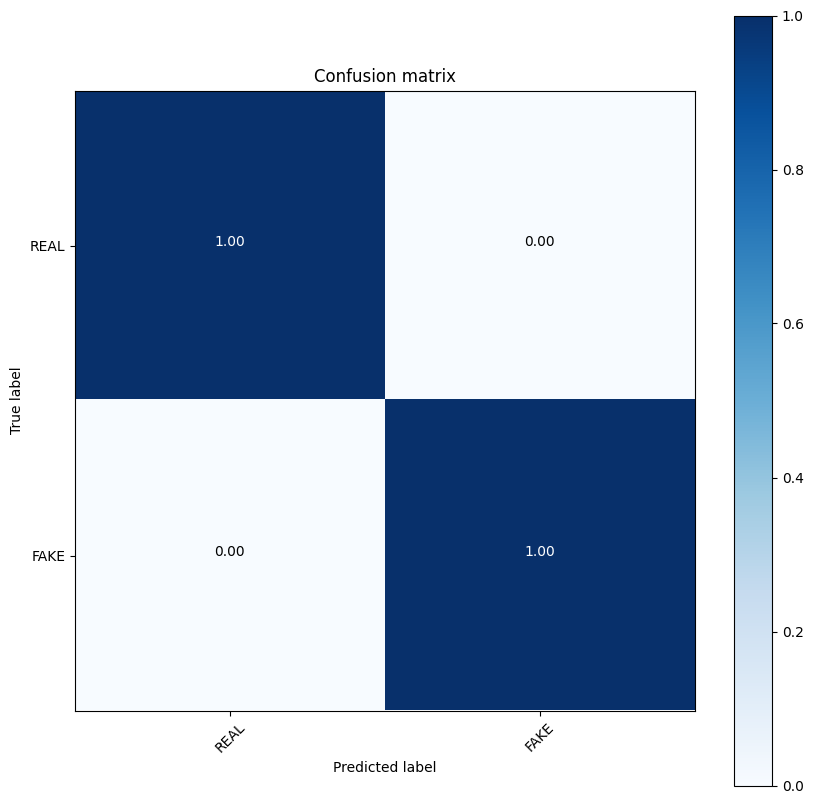

In [12]:
cm = confusion_matrix(y_test, y_pred) # Use the non-vectorized data
classes = ['REAL', 'FAKE']
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes, normalize=True)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

Testing accuracy is a perfect 100%.

## Conclusion

In an age where information moves faster than ever, the unrestrained spread of lies endangers not just our individual knowledge, but also the health of our society as a whole.

The advent of false news emphasizes the significance of media literacy and critical thinking abilities. I feel it is critical that we all arm ourselves with the tools to distinguish between legitimate and deceptive sources, to cross-reference materials, and to question what we encounter. We can only expect to resist the ubiquitous effect of false news by actively engaging with information and seeking out diverse views.

Furthermore, it is the role of digital platforms, journalists, and legislators to combat fake news, ***and not just people.*** To combat the spread of disinformation, tech companies must continue to improve their algorithms and standards. Journalists must follow ethical guidelines, emphasize fact-checking, and avoid the temptation to choose sensationalism over accuracy. Policymakers should enact policies that enhance media literacy instruction in schools and communities, as well as increase openness in information distribution.

In these times where the distinctions between fact and fiction may become blurred, it is our common responsibility to protect the integrity of information. By doing so, we can aim for a society in which truth triumphs over fabrication, informed judgments are the norm, and the power of honest discourse triumphs over the appeal of falsehoods.

### Thank you!